# Overview

In this notebook we explore quantiles in the following sections:
1. What is a quantile
2. Probability Refresher
3. What is a quantile function
4. How are quantiles used

# 1. What is a Quantile
A quantile is a point or number that partitions a distribution of a data set. Ie. it divides a distribution into contiguous disjoint intervals.

A user can specify to partition a dirstibution into two or more partitions. These resulting partitions may or may not be uniformally sized.

Confusingly, quantile can also refer to the partitions bound by the quantile points. So the first quantile for example refers to both the point along the x-axis that partitions the distribution as well as the partition confined within that partitioning point.

There are special names given to specific sets of quantiles. Sets of 4 are quartiles, 10 are deciles, 100 are percentiles. A more exhaustive list is maintained [here](https://en.wikipedia.org/wiki/Quantile#Specialized_quantiles).

Consider the following diagram which shows the normal distribution being divided into four equal quartiles by three quantiles ($Q1,Q2,Q3$).

<img src="./normal_distribution_quantiles.png" alt="Normal Distribution Quantiles" width="400"/>

https://en.wikipedia.org/wiki/Quantile

# 2. Probability Refresher
The upcoming topic (the quantile function) is closely related to concepts in probability. We will review the relevant concepts before proceeding.

## 2.1. Probability Density Function
The probability density function (or probability mass function in the discrete case) gives the probability that a variable falls within a particular range of values.

The density of $X$ is defined as $f_X$, or $\phi_X(x)$ such that:

$$ P(a \le X \le b) = \int_a^b f_X(x)dx $$

A graph of the PDF resembles the following:

<img src="normal distribution pdf.png" style="width:300px" >

## 2.2. Cumulative Density Function
This function is also referred to as the distribution function.

It is a special case of the probability density function.

A cumulative density function gives the cumulative probability density for the interval $(-\infty, x)$. In layman's terms it is the probability that $X$ takes on a value less than or equal to $x$.

For the variable $X$ the CDF is often written as:

$$ F_X(x):=P(X<=x) $$

This function typically takes on an s-shaped curve. For example consider the CDF for the normal distribution denoted as $\Phi_{\mu,\sigma}(X)$:

<img src="normal distribution cdf.png" style="width:300px" >

Now that that's out of the way, lets talk about Quantile Functions.

# 3. What Is A Quantile Function?

As the name suggests, a quantile function returns a quantile. More specifically, it returns the left most quantile.

So if we have a quantile function $Q_X(p_x)$ where $p_x$ is a percentage of values of X that are less than or equal to x. Our function would be defined as follows:

$$ Q_X(p_x)= x $$

# 3.1. What It The Connection With Probability?

Relating this to a probability, our percentage $p_x$ can also be a probabiliy; objects from a probability space and a percentile space have similar mathematical characteristics.

In this case we would define $p_x$ such that:

$$p_x := F_X(x) = P(X \le x)$$

And as our quantile function accepts a probability $p_x$ and returns the coresponding value $x$ we see that it begins to look like an inverse CDF function:

$$ Q_X(p_x) = x $$

$$ F_X^{-1}(p_x) = x $$

So for example, if we want the quantile $x$ that will partition the x axis of the distribution functions into segments containing 1/4 and 3/4 of the distribution values we would find the quantile $x$ such that $Q_X(p=\frac{1}{4})=x$. Again, this can be done using the inverse cumulative density function $F_X^{-1}(p=\frac{1}{4})=x$

# 4. How Are Quantiles Used?

## 4.1 Connection with CDF and PDF Approximation

We will see that the many CDF approximation techniques are defined in terms of a quantile.

For example the Generalize Lambda distribution is defined as such:

$$ Q(y)=Q(y;\lambda_1,\lambda_2,\lambda_3,\lambda_4) = \lambda_1 + \frac{y^{\lambda_3}-(1-y)^{\lambda_4}}{\lambda_3}  $$

where $0 \le y \le 1$.

The probability density function (PDF) for the GLD can be derived from the percentile function and is defined as follows:

$$ f(x) = \frac{\lambda_2}{\lambda_3 y^{\lambda_3 - 1} + \lambda_4(1-y)^{\lambda_4 - 1}} $$

at $x=Q(y)$. ans since $x=Q(y)$ we have $y=F(x)$.

## 4.2. Quantile-Quantile (QQ) Plots

A QQ plot is a graphical tool to help us compare one distribution against another. A QQ plot will plot the quantiles of one variable or sample against another. The resulting line, and it's shape, indicate how the two quantiles, and thus ditributions, are related.

If the two distributions are equal, the quantiles will be equal which will result in a $45^\circ$ line.

<img src='equivalent qq plot.png' style='width:300px' >

If the two distributions are unequal you will not see a strainght $45^\circ$ line.

<img src='chi vs normal qq plot.png' style='width:300px' >

There are many shapes the QQ plot can take on. The table below outlines the important ones:

<table>
	<thead>
		<tr>
			<th style="text-align: left;">Shape</th>
			<th style="text-align: left;">Interpretation</th>
            <th style="text-align: left;">Explanation</th>
		</tr>
	</thead>
       <colgroup>
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 55%;">
    </colgroup>
	<tbody>
		<tr>
			<td style="text-align: left;">Steep Line</td>
			<td style="text-align: left;">Y is more dispersed than X</td>
            <td style="text-align: left;">
                Each quantile of Y is larger than the corresponding quantile of X.
                Thus each percentage of values of Y exist in a larger range of values
                than the values of X for the same percentage.
                A larger range for Y means that the data points are more dispersed.
            </td>
		</tr>
		<tr>
			<td style="text-align: left;">45&deg; line</td>
			<td style="text-align: left;">Y is equally dispersed as X (Y = X)</td>
            <td style="text-align: left;">
            For each quantile, there are the same number of X and Y values.
            </td>
		</tr>
		<tr>
			<td style="text-align: left;">Flat Line</td>
			<td style="text-align: left;">Y is less dispersed than X</td>
            <td style="text-align: left;">Opposite of steep line</td>
		</tr>
		<tr>
			<td style="text-align: left;">Concave Up (slope increasing)</td>
			<td style="text-align: left;">Y is less skewed than X</td>
            <td style="text-align: left;">
            Accelleration is described as an increasing slope.
            In the context of quantiles, it means that one axis is experiencing greater dispersion.
            A greater relative dispersion means a greater grouping of point on the opposing axis.
            A grouping of values indicates a skew.
            </td>
		</tr>
		<tr>
			<td style="text-align: left;">Concave Down</td>
			<td style="text-align: left;">Y is more skewed than X</td>
            <td style="text-align: left;">Opposite of concave up</td>
		</tr>
		<tr>
			<td style="text-align: left;">S-shaped</td>
			<td style="text-align: left;">Y has heavier tails than X</td>
            <td style="text-align: left;">
            The tails of the qq plot are flatter rather than steeper.
            Flattening of the plot indicates that Y is less dispersed than X.
            The means that the tails of Y are less dispersed than X.
            The dispersion stretches a tail, so a relative lack of dispersion 
            results in a "fatter" or "heavier" tail.
            </td>
		</tr>
		<tr>
			<td style="text-align: left;">Backwards-S</td>
			<td style="text-align: left;">Y has lighter tails than X</td>
            <td style="text-align: left;">
            Opposite of S shaped
            </td>
		</tr>
	</tbody>
</table>

Blow we can see some examples of these plots:

### 4.2.1. QQ Plots in Python
This statsmodels python library has builtin methods that help us creating a QQ plot.

The qqplot() function for example allows us to generate a qq plot which compares our sample data to some known theoretical distribution. By default this distribution is the normal distribution.

https://www.statsmodels.org/devel/generated/statsmodels.graphics.gofplots.qqplot.html

In [26]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import statsmodels.api as sm
from scipy.stats import norm

### Set the precision
precision = 2

# Generate a random variable
sample_size = 1000000
numpy.random.seed(seed=42)
x = numpy.arange(0,sample_size)
y = numpy.random.normal(0, 1, sample_size)
#y = numpy.round(y, precision)

# Print the statistics for the data set
print("Sample mean: {0}".format(y.mean()))
print("Sample std dev: {0}".format(y.std()))

# Determine the number of posisble values within this discretization
#y_min = y.min()
#y_max = y.max()
#y_range = y_max - y_min
#possible_values = int(y_range / 10 ** - precision)
#print("possible values: {0}".format(possible_values))

# Generate a histogram information for the variable (see the histogram notebook)
bins = 500
counts, bin_edges = numpy.histogram(y, bins=bins)

# Calculate the probabilities of each bin

bin_witdth = numpy.diff(bin_edges, 1)[0]
bin_units = bin_witdth * 10 ** - precision
bin_midpoints = bin_edges[:-1] + (bin_witdth / 2)
probabilities = counts / sum(counts * bin_witdth)
probabilities = counts / sample_size

print("probabilities range from {0} to {1}".format(min(probabilities), max(probabilities)))
print("probabilities sum: {0}".format(probabilities.sum()))

# Generate information about our distribution
print("y ranges from {0} to {1}".format(min(y), max(y)))
y_sort = numpy.sort(y, axis=-1, kind='quicksort', order=None)
norm_pdf = norm(0,1).pdf(y_sort)

# Create our plot objects
fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(nrows=1, ncols=4)
fig.set_figwidth(30)

# Graph the variable, the histogram, and the qq plot
ax1.scatter(x, y)
ax2.bar(bin_midpoints, probabilities)
ax3.plot(y_sort, norm_pdf, color='red')
fig = sm.qqplot(Y, line='45', ax=ax4)

In [188]:
bin_witdth

0.01902000000000026

In [187]:
(y.max() - y.min()) / bins

0.01902

In [189]:
sum(counts * bin_witdth)

19020.000000000284

In [204]:
sample_size * (y.max() - y.min()) / bins

19020.0

In [208]:
len(set(y))

1000000

In [209]:
sum(counts)

1000000

In [205]:
bins / (y.max() - y.min())

52.576235541535226

In [206]:
sample_size / sum(counts * bin_witdth)

52.576235541534444

In [213]:
p = counts / sample_size
sum(p)

1.0000000000000004

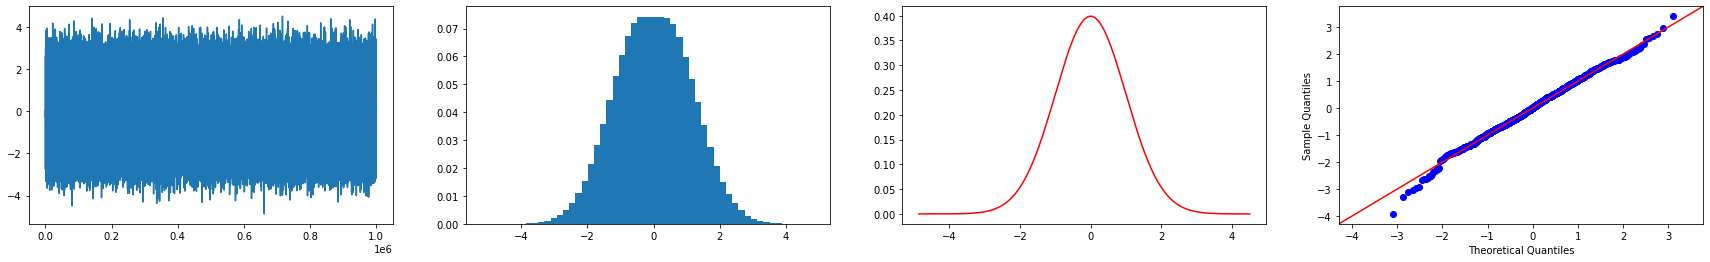